In [49]:
import torch
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [50]:
W = torch.zeros(1,1) # w,b를 0으로 초기화
b = torch.zeros(1,1)
lr = 1.0

In [51]:
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b) # 선형 회귀와 다른 부분
  # 1차 직선 대신 시그모이드 함수를 사용
  cost = torch.mean(-y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis))
  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(
    epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [52]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [53]:
# 옵티마이저는 여러개 구현되어 있음

optimizer = torch.optim.SGD([W,b], lr=1.0)
# optimizer = torch.optim.SGD([W,b], lr=1.0)
# optimizer = torch.optim.Adam([W,b], lr=1.0)
# optimizer = torch.optim.Adadelta([W,b])
# optimizer = torch.optim.Adagrad([W,b])
# optimizer = torch.optim.RMSprop([W,b])

In [54]:
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)
  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(hypothesis)
 -(1 - y_train) * torch.log(1 - hypothesis))
  # cost.backward()
  # with torch.no_grad() as grd:
  #   W = W - lr * W.grad
  #   b = b - lr * b.grad
  optimizer.zero_grad() # 기존의 직접 구현을 미리 구현된 모듈 사용
  cost.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(
    epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.381491, W: -3.096674, b: 9.376342
epoch: 100, cost: 0.381491, W: -3.097791, b: 9.379672
epoch: 200, cost: 0.381491, W: -3.098733, b: 9.382483
epoch: 300, cost: 0.381491, W: -3.099529, b: 9.384856
epoch: 400, cost: 0.381491, W: -3.100201, b: 9.386860
epoch: 500, cost: 0.381491, W: -3.100768, b: 9.388552
epoch: 600, cost: 0.381491, W: -3.101247, b: 9.389980
epoch: 700, cost: 0.381491, W: -3.101651, b: 9.391188
epoch: 800, cost: 0.381491, W: -3.101992, b: 9.392203
epoch: 900, cost: 0.381491, W: -3.102282, b: 9.393066
epoch: 1000, cost: 0.381491, W: -3.102524, b: 9.393790
epoch: 1100, cost: 0.381491, W: -3.102730, b: 9.394404
epoch: 1200, cost: 0.381491, W: -3.102904, b: 9.394921
epoch: 1300, cost: 0.381491, W: -3.103051, b: 9.395362
epoch: 1400, cost: 0.381491, W: -3.103179, b: 9.395742
epoch: 1500, cost: 0.381491, W: -3.103278, b: 9.396037
epoch: 1600, cost: 0.381491, W: -3.103373, b: 9.396320
epoch: 1700, cost: 0.381491, W: -3.103440, b: 9.396523
epoch: 1800, cost: 0.3

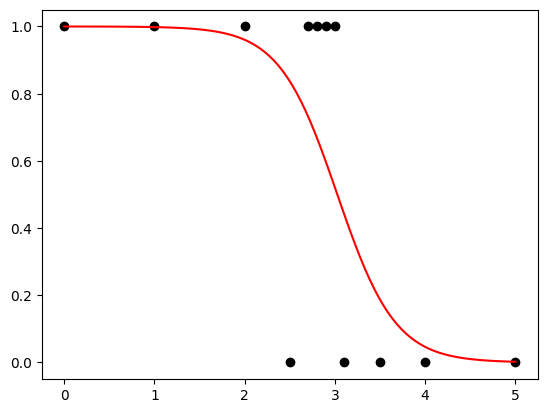

In [39]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train, c="black")
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X, Y, c="#ff0000")
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
#W와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)
# 새로운 x값이 주어질 때 y값 예측
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
